# Evaluation of [sample data](../data/sample2.csv)

In [28]:
# Imports

import pandas as pd
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

## Summary Stats

In [29]:
df = pd.read_csv('../data/used_cars_data.csv')

price_summary = df['price'].describe()

# Print the summary statistics
print("Price Summary Statistics")
print(price_summary)

Price Summary Statistics
count     92546.000000
mean      21437.529943
std       16415.222889
min         484.000000
25%       13486.250000
50%       18643.000000
75%       26307.500000
max      999995.000000
Name: price, dtype: float64


In [30]:
# Median calc

mean_price = np.mean(df['price'])
print("Mean Price:", mean_price)

median_price = np.median(df['price'])
print("Median Price:", median_price)

Mean Price: 21437.52994283923
Median Price: 18643.0


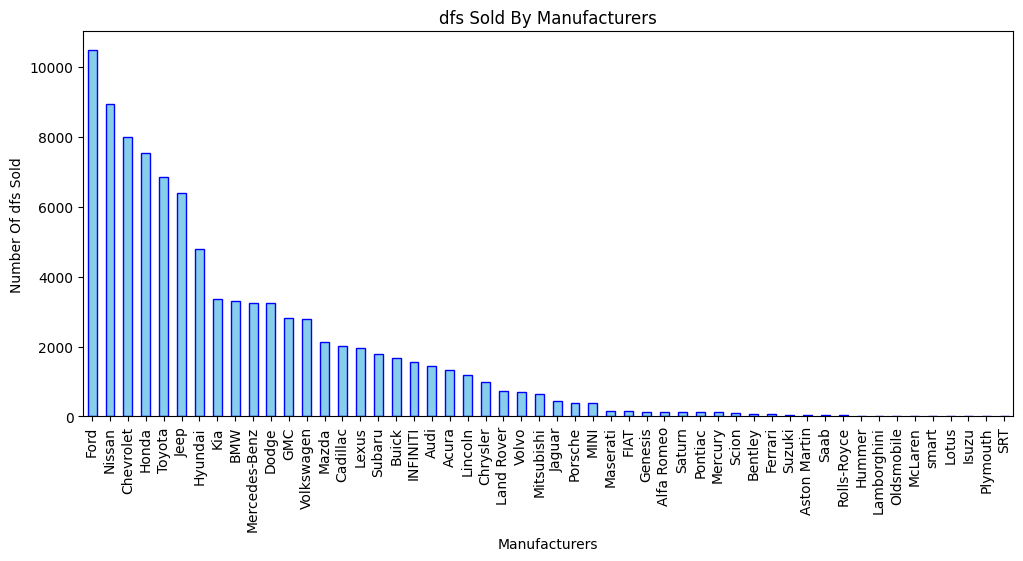

In [31]:
value_counts = df['make_name'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12,5))

value_counts.plot(kind='bar', color='skyblue', edgecolor='blue')

# Adding labels and title
plt.xlabel('Manufacturers')
plt.ylabel('Number Of dfs Sold')
plt.title('dfs Sold By Manufacturers')

# Display the plot
plt.show()

In [32]:
# Determine skewness

price_data=df['price']
skewness = skew(price_data)
print("Skewness:", skewness)

print(price_data)

Skewness: 13.721557006429808
0        16499.0
1         2465.0
2        12499.0
3        16900.0
4        59550.0
          ...   
92541    16496.0
92542    44300.0
92543    29598.0
92544    19999.0
92545    18075.0
Name: price, Length: 92546, dtype: float64


In [33]:
print(min(price_data), max(price_data))

484.0 999995.0


## Boxplot: to visualize skewness

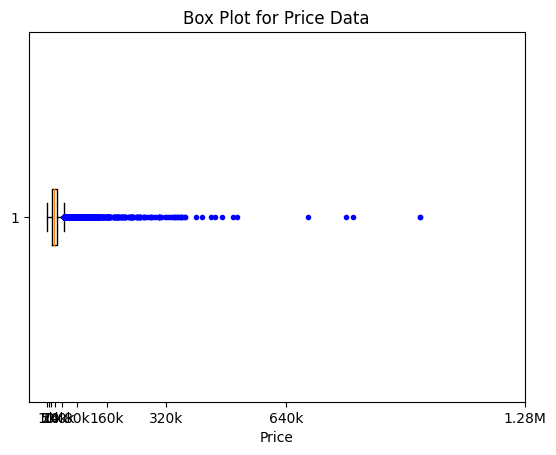

In [34]:
# Create a box plot for the price data
plt.boxplot(price_data, vert=False, sym='b.')
plt.xlabel('Price')

plt.title('Box Plot for Price Data')

x_ticks = [0, 5000, 10000, 20000, 40000, 80000, 160000, 320000, 640000, 1280000]
x_tick_labels = ['0', '5k', '10k', '20k', '40k', '80k', '160k', '320k', '640k', '1.28M']
plt.xticks(x_ticks, x_tick_labels)

# Output
plt.show()

#### The sample data appears skewed (box plot)

## Histogram

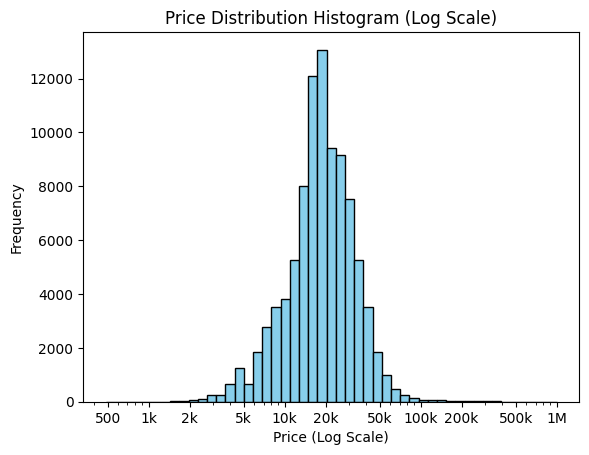

In [35]:
# Create a histogram with custom bins on a logarithmic scale
bins = np.logspace(np.log10(min(price_data)), np.log10(max(price_data)), 50)

# Create a histogram
plt.hist(price_data, bins=bins, color='skyblue', edgecolor='black')

plt.xlabel('Price (Log Scale)')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram (Log Scale)')

# Setting x-axis ticks to display prices as "500," "1k," "2k," etc.
x_ticks = [500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
x_tick_labels = ['500', '1k', '2k', '5k', '10k', '20k', '50k', '100k', '200k', '500k', '1M']
plt.xscale('log')
plt.xticks(x_ticks, x_tick_labels)

# Output
plt.show()

## Outliers

In [36]:
# Calculate the IQR for the price column
Q1 = price_data.quantile(0.25)
Q3 = price_data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(min(price_data),max(price_data))
print(lower_bound, upper_bound)


484.0 999995.0
-5745.625 45539.375


## Cap Data

In [37]:
# Cap the outliers by setting them to the lower or upper bound
price_data = price_data.clip(lower_bound, upper_bound)

print(price_data)

0        16499.000
1         2465.000
2        12499.000
3        16900.000
4        45539.375
           ...    
92541    16496.000
92542    44300.000
92543    29598.000
92544    19999.000
92545    18075.000
Name: price, Length: 92546, dtype: float64


# Notes

- Clipping outliers based on the upper bound found could affect the predictive accuracy of the model in certain scenarios. For example, for high-end cars.
- The model may also under-predict the prices for cars that should actually be more than the upper bound.
- Therefore, we have 2 options:
- - Apply a better method to mitigate skewness
- - Use a model less sensitive to outliers



## Box Plot of Capped Data

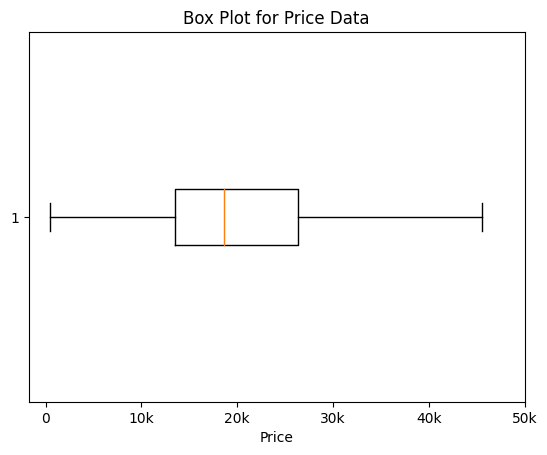

In [38]:
plt.boxplot(price_data, vert=False, sym='b.')
plt.xlabel('Price')

# Add a title
plt.title('Box Plot for Price Data')

# Set custom x-axis ticks and labels
x_ticks = [0, 10000, 20000, 30000, 40000, 50000]
x_tick_labels = ['0', '10k', '20k', '30k', '40k', '50k']
plt.xticks(x_ticks, x_tick_labels)

# Show the box plot
plt.show()